### 네이버 "이런점이 좋아요" 빈도 분석

In [2]:
import pandas as pd
import numpy as np
import re
import os

from wordcloud import WordCloud, STOPWORDS
from PIL import Image  # 그림 불러오는 패키지
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
rcParams['font.family'] = 'Malgun Gothic'
#rcParams['font.family'] = 'Apple Gothic'


#NLTK Stopwords
from nltk.corpus import stopwords

In [3]:
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
['Malgun Gothic' in f]

[True]

In [4]:
naver_df = pd.read_csv('../DAOU/naver2.csv', index_col=0, encoding='euc-kr')

In [5]:
naver_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5438 entries, 어반스테이 명동 to 파크하얏트서울
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   업소유형                    852 non-null    object 
 1   업태구분명                   5438 non-null   object 
 2   지번주소                    5427 non-null   object 
 3   도로명주소                   3713 non-null   object 
 4   가까운 지하철역                5438 non-null   object 
 5   지하철역과의 거리               5438 non-null   float64
 6   도보시간                    5438 non-null   float64
 7   위도                      5438 non-null   float64
 8   경도                      5438 non-null   float64
 9   별점                      297 non-null    float64
 10  방문자 리뷰수                 666 non-null    float64
 11  블로그 리뷰수                 496 non-null    float64
 12  한실수                     4371 non-null   float64
 13  양실수                     4347 non-null   float64
 14  욕실수                     3953 non-nu

In [6]:
#naver_df['네이버 이런점이 좋아요 {항목:좋아요수}'] = naver_df['네이버 이런점이 좋아요 {항목:좋아요수}'].replace("{", "").replace("}", "")
#naver_df['네이버 이런점이 좋아요 {항목:좋아요수}'].replace("}", "")
len(naver_df[pd.notna(naver_df['네이버 이런점이 좋아요 {항목:좋아요수}'])])
text_array = naver_df[pd.notna(naver_df['네이버 이런점이 좋아요 {항목:좋아요수}'])]['네이버 이런점이 좋아요 {항목:좋아요수}'].to_list()
text_array

["{'깨끗해요': 29},{'조용히 쉬기 좋아요': 22},{'냉난방이 잘돼요': 22},{'침구가 좋아요': 21},{'대중교통이 편해요': 13},{'화장실이 잘 되어있어요': 13},{'뷰가 좋아요': 11},{'인테리어가 멋져요': 7},{'친절해요': 6},{'근처에 갈 곳이 많아요': 6},{'즐길 거리가 많아요': 2},{'사진이 잘 나와요': 2},{'방음이 잘돼요': 2}",
 "{'근처에 갈 곳이 많아요': 7},{'침구가 좋아요': 6},{'친절해요': 6},{'깨끗해요': 5},{'화장실이 잘 되어있어요': 4},{'즐길 거리가 많아요': 3},{'대중교통이 편해요': 3},{'인테리어가 멋져요': 2},{'조용히 쉬기 좋아요': 1},{'주차하기 편해요': 1},{'방음이 잘돼요': 1}",
 "{'인테리어가 멋져요': 30},{'친절해요': 29},{'깨끗해요': 18},{'조용히 쉬기 좋아요': 18},{'근처에 갈 곳이 많아요': 13},{'뷰가 좋아요': 12},{'사진이 잘 나와요': 11},{'대중교통이 편해요': 10},{'냉난방이 잘돼요': 4},{'방음이 잘돼요': 3},{'화장실이 잘 되어있어요': 3},{'주차하기 편해요': 1}",
 "{'친절해요': 34},{'인테리어가 멋져요': 32},{'깨끗해요': 25},{'사진이 잘 나와요': 20},{'조용히 쉬기 좋아요': 13},{'침구가 좋아요': 11},{'호캉스하기 좋아요': 11},{'즐길 거리가 많아요': 9},{'뷰가 좋아요': 9},{'냉난방이 잘돼요': 6},{'주차하기 편해요': 5},{'조식이 맛있어요': 3},{'대중교통이 편해요': 3},{'수영장이 잘 되어있어요': 1},{'방음이 잘돼요': 1}",
 "{'인테리어가 멋져요': 417},{'조용히 쉬기 좋아요': 394},{'호캉스하기 좋아요': 344},{'깨끗해요': 338},{'침구가 좋아요': 299},{'친절해요': 250},{'사진이 잘 나와요': 136},{'주차하기 편해요': 

In [7]:
len(text_array)

183

In [8]:
text_list = []
#for i in [1]:
for i in range(len(text_array)):
    line_split = text_array[i].split(",")
    #print(line_split)
    #print(len(line_split))

    for li in line_split:
        #print(j)
        ele_text = li.replace("{","").replace("}","").split(":")[0]
        ele_count = int(li.replace("{","").replace("}","").split(":")[1])
        #print(li)
        #print(i, ele_text, ele_count)
        text_append = (ele_text+" ")*ele_count
        #print(text_append)
        text_list.append(text_append)
    
    
    #print(f'------------{i} 끝')

#print(text_list)
len(text_list)

# 저장
with open('../DAOU/text_out.txt', 'w', encoding='utf-8') as fp:
    for answer in text_list:
        fp.write(answer + '\n')


In [9]:
with open('../DAOU/text_out.txt', encoding='utf-8') as file:
    text = file.read()

In [10]:
#한글 형태소 분석기
from konlpy.tag import Okt, Kkma, Komoran
okt = Okt()

In [11]:
# 명사 추출
tokens = okt.nouns(text)

In [12]:
# 영문자, 숫자, 부호제거
import re
tokens = [re.sub('[^가-힣]', '', token) for token in tokens]

In [13]:
import nltk
nltk.download('punkt') #코랩에서는 매번 다운함 / 로컬에서는 한번만 실행

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tjoeun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

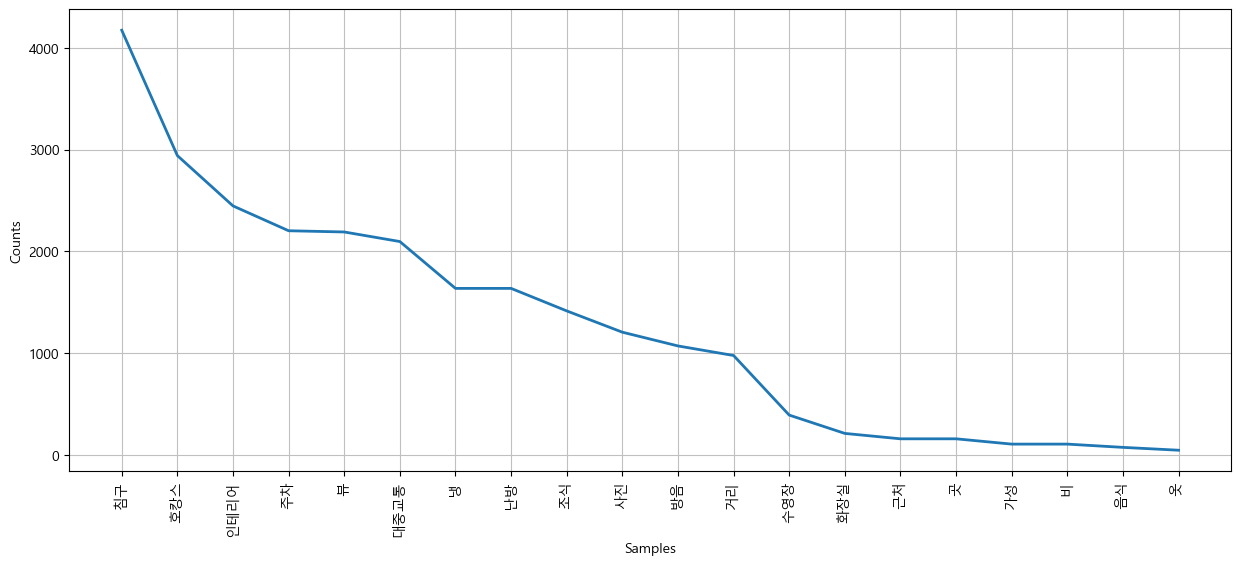

In [17]:
gift = nltk.Text(tokens, name = '네이버 크롤링')
plt.figure(figsize=(15,6))
gift.plot(20)
plt.show()

별점 높은 순: 별점 상위 50개 \
별점 낮은 순: 별점 하위 50개

In [42]:
print(naver_df.shape)
naver_df_score = naver_df[ (pd.notna(naver_df['별점'])) & (pd.notna(naver_df['네이버 이런점이 좋아요 {항목:좋아요수}'])) ]
naver_df_score.shape

(5438, 31)


(151, 31)

In [54]:
sort_naver_df_score = naver_df_score.sort_values(by=['별점'], ascending=False)
sort_naver_df_score['별점'].min()

3.07

In [70]:
top50 = sort_naver_df_score.iloc[0:50]
bottom50 = sort_naver_df_score.iloc[-50:-1]
bottom50.tail(5)

,업소유형,업태구분명,지번주소,도로명주소,가까운 지하철역,지하철역과의 거리,도보시간,위도,경도,별점,...,영업상태코드,폐업일자,휴업시작일자,휴업종료일자,재개업일자,naver_pk,리뷰수,객실수,구비시설 개수,운영기간
사업장명,,,,,,,,,,,,,,,,,,,,,
호텔컬리넌대치,3성급,여관업,서울특별시 강남구 대치동 891-35,서울특별시 강남구 테헤란로78길 14-16 (대치동),"선릉, 분당선",481.534105,7.219402,37.505108,127.054244,3.50,...,1,NaN,NaN,NaN,NaN,"37.5051075694, 127.0542438501",48.0,51.0,4.0,NaN
넘버25호텔 동대문점,모텔,숙박업 기타,서울특별시 중구 광희동1가 182-30,"서울특별시 중구 을지로44길 17-7, 1~5층 (광희동1가)","동대문역사문화공원, 4호선",90.101633,1.350849,37.565263,127.006878,3.50,...,1,NaN,NaN,NaN,NaN,"37.5652625241, 127.0068782209",54.0,NaN,NaN,NaN
아르고,3성급,일반호텔,서울특별시 강동구 길동 415-18,서울특별시 강동구 진황도로 93 (길동),"길동, 5호선",328.924763,4.931406,37.536176,127.136892,3.39,...,1,NaN,NaN,NaN,NaN,"37.5361760112, 127.1368916978",39.0,NaN,9.0,NaN
VATICA HOTEL(바티카 호텔),1성급,관광호텔,서울특별시 종로구 창신동 436-73,서울특별시 종로구 청계천로 341 (창신동),"동묘앞, 6호선",238.953136,3.582506,37.570128,127.015528,3.35,...,1,NaN,NaN,NaN,NaN,"37.5701283418, 127.0155280549",179.0,50.0,7.0,NaN
GALLERY(갤러리),모텔,여관업,서울특별시 노원구 월계동 38-6,서울특별시 노원구 화랑로 343 (월계동),"석계, 6호선",58.510741,0.877222,37.615268,127.066033,3.29,...,1,NaN,NaN,NaN,NaN,"37.6152677035, 127.0660328845",35.0,NaN,NaN,NaN


In [67]:
def df_to_token_for_nltkText(df):

    #한글 형태소 분석기
    from konlpy.tag import Okt, Kkma, Komoran
    import re
    okt = Okt()

    # df to list
    text_array = df[pd.notna(df['네이버 이런점이 좋아요 {항목:좋아요수}'])]['네이버 이런점이 좋아요 {항목:좋아요수}'].to_list()

    # dic to list
    text_list = []

    #for i in [1]:
    for i in range(len(text_array)):
        line_split = text_array[i].split(",")
        # print(line_split)
        # print(len(line_split))

        for li in line_split:
            
            ele_text = li.replace("{","").replace("}","").split(":")[0]
            ele_count = int(li.replace("{","").replace("}","").split(":")[1])
            # print(li)
            # print(i, ele_text, ele_count)
            text_append = (ele_text+" ")*ele_count
            # print(text_append)
            text_list.append(text_append)


        # print(f'------------{i} 끝')

    # print(text_list)
    # len(text_list)

    # 저장
    # text = '\n'.join(answer)
    # print(text)

    with open('../DAOU/text_out.txt', 'w', encoding='utf-8') as fp:
        for answer in text_list:
            fp.write(answer + '\n')


    with open('../DAOU/text_out.txt', encoding='utf-8') as file:
        text = file.read()

    # 명사 추출
    tokens = okt.nouns(text)

    tokens = [re.sub('[^가-힣]', '', token) for token in tokens]

        
    return tokens

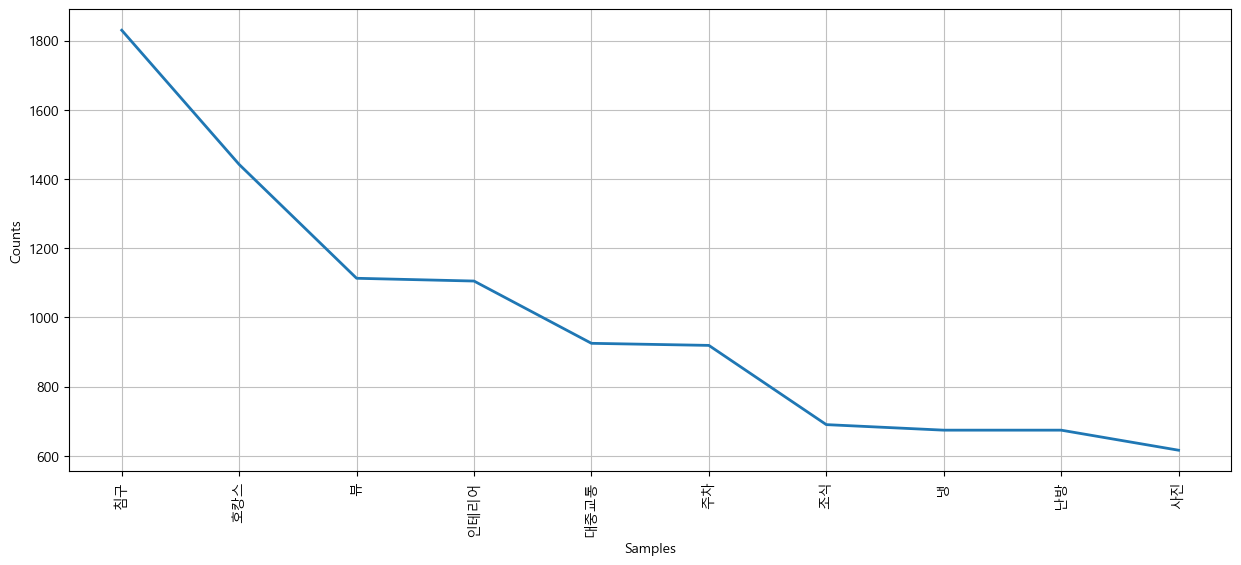

In [73]:
tokens_top50 = df_to_token_for_nltkText(top50)

gift = nltk.Text(tokens_top50, name = '네이버 크롤링 top50')
plt.figure(figsize=(15,6))
gift.plot(10)
plt.show()

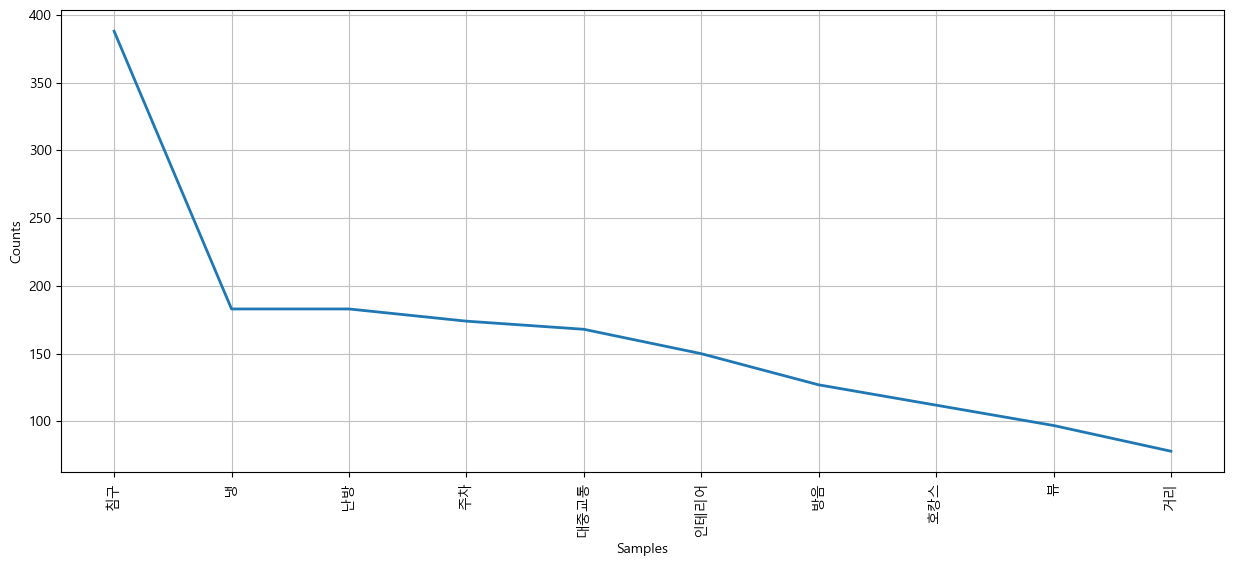

In [74]:
tokens_bottom50 = df_to_token_for_nltkText(bottom50)

gift = nltk.Text(tokens_bottom50, name = '네이버 크롤링 bottom50')
plt.figure(figsize=(15,6))
gift.plot(10)
plt.show()